In [1]:
%pylab inline
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
import os

faint = fits.getdata('/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_out/wise_ebv1000_faint/subset/sim_wise_ebv1000_faint.fits')

Populating the interactive namespace from numpy and matplotlib


In [118]:
topdir_obiwan_out='/global/cscratch1/sd/adematti/legacysim/dr9/'
name_for_run='ebv1000shaper'
rs_type='file0_rs0_skip0'
region='south'
band = 'z'

In [2]:
detected = faint[faint['detected']]

(array([2.3008e+04, 1.0570e+03, 1.7100e+02, 4.7000e+01, 2.1000e+01,
        1.1000e+01, 6.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([6.29134593e-06, 2.23140943e-01, 4.46275594e-01, 6.69410246e-01,
        8.92544897e-01, 1.11567955e+00, 1.33881420e+00, 1.56194885e+00,
        1.78508350e+00, 2.00821815e+00, 2.23135281e+00]),
 <a list of 10 Patch objects>)

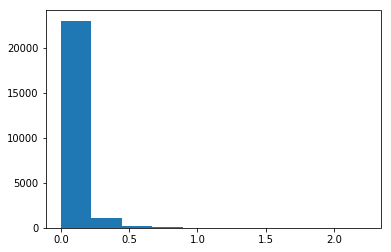

In [3]:
sel = (detected['flux_g']>0)&(detected['flux_g']<6)&(detected['flux_r']>0)&(detected['flux_r']<6)&(detected['flux_z']>0)&(detected['flux_z']<10)
plt.hist(detected['flux_g'][sel])

(array([1.5496e+04, 7.4920e+03, 9.6300e+02, 2.4900e+02, 6.3000e+01,
        3.3000e+01, 1.6000e+01, 5.0000e+00, 5.0000e+00, 6.0000e+00]),
 array([2.56922329e-03, 4.08527158e-01, 8.14485093e-01, 1.22044303e+00,
        1.62640096e+00, 2.03235890e+00, 2.43831683e+00, 2.84427477e+00,
        3.25023270e+00, 3.65619064e+00, 4.06214857e+00]),
 <a list of 10 Patch objects>)

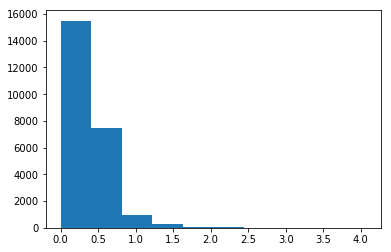

In [4]:
plt.hist(detected['flux_r'][sel])

(array([  317.,  8578., 10629.,  2919.,  1009.,   458.,   183.,   112.,
           74.,    49.]),
 array([8.67575593e-03, 1.00735118e+00, 2.00602660e+00, 3.00470203e+00,
        4.00337745e+00, 5.00205287e+00, 6.00072830e+00, 6.99940372e+00,
        7.99807915e+00, 8.99675457e+00, 9.99542999e+00]),
 <a list of 10 Patch objects>)

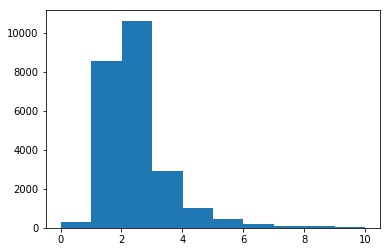

In [5]:
plt.hist(detected['flux_z'][sel])

/global/homes/h/huikong/.conda/envs/cfastpm/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


Text(0,0.5,'decection ratio')

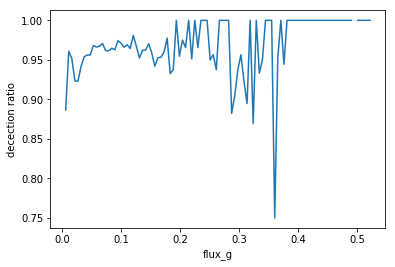

In [29]:
sel1 = (detected['sim_gflux']>0)&(detected['sim_gflux']<10)
sel2 = (faint['sim_gflux']>0)&(faint['sim_gflux']<4)
ng,bins,_ = plt.hist(detected['sim_gflux'][sel1],bins=100)
n2g,bins,_ = plt.hist(faint['sim_gflux'][sel2],bins=bins)
plt.clf()
plt.plot(bins[1:],ng/n2g)

plt.xlabel('flux_g')
plt.ylabel('decection ratio')

Text(0,0.5,'decection ratio')

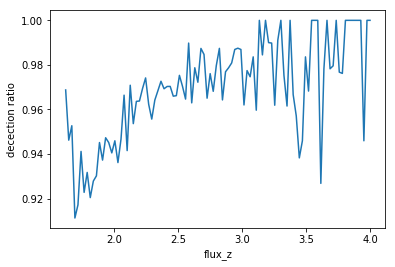

In [36]:
sel1 = (detected['sim_zflux']>1.6)&(detected['sim_zflux']<4)
sel2 = (faint['sim_zflux']>1.6)&(faint['sim_zflux']<4)
nz,bins,_ = plt.hist(detected['sim_zflux'][sel1],bins=100)
n2z,bins,_ = plt.hist(faint['sim_zflux'][sel2],bins=bins)
plt.clf()
plt.plot(bins[1:],nz/n2z)
#plt.hist(faint['sim_zflux'][sel2],density=True)
plt.xlabel('flux_z')
plt.ylabel('decection ratio')

Text(0,0.5,'decection ratio')

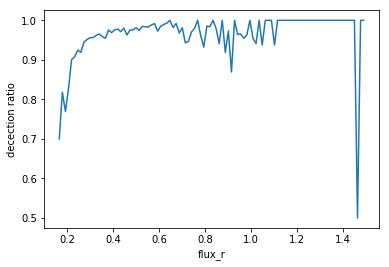

In [31]:
sel1 = (detected['sim_rflux']>0)&(detected['sim_rflux']<4)
sel2 = (faint['sim_zflux']>0)&(faint['sim_rflux']<4)
nr,bins,_ = plt.hist(detected['sim_rflux'][sel1],bins=100)
n2r,bins,_ = plt.hist(faint['sim_rflux'][sel2],bins=bins)
plt.clf()
plt.plot(bins[1:],nr/n2r)
#plt.hist(faint['sim_rflux'][sel2],density=True)
plt.xlabel('flux_r')
plt.ylabel('decection ratio')

/global/homes/h/huikong/.conda/envs/cfastpm/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


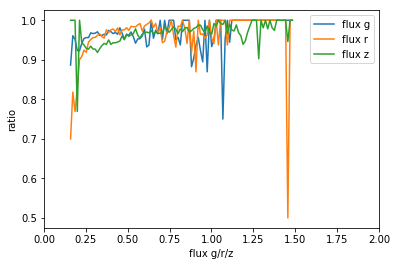

In [32]:
x = (bins[1:]+bins[:-1])/2.
plt.plot(x,ng/n2g,label='flux g')
plt.plot(x,nr/n2r,label='flux r')
plt.plot(x,nz/n2z,label='flux z')
plt.gca().set_xlim((0,2))
#plt.hist(summary['input_flux_g'],cumulative=True,density=True,bins=bins,alpha=0.5,label='flux g dist')
plt.xlabel('flux g/r/z')
plt.ylabel('ratio')
plt.legend()

/global/homes/h/huikong/.conda/envs/cfastpm/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/global/homes/h/huikong/.conda/envs/cfastpm/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5,1,'g flux')

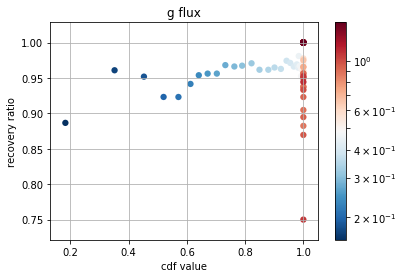

In [33]:
import matplotlib.colors as colors

x = (bins[1:]+bins[:-1])/2.
plt.plot(x,ng/n2g,label='flux g')
plt.plot(x,nr/n2r,label='flux r')
plt.plot(x,nz/n2z,label='flux z')
plt.gca().set_xlim((0,2))

ngc,bins,_ = plt.hist(faint['sim_gflux'],cumulative=True,density=True,bins=bins,alpha=0.5,label='flux g dist')
plt.clf()

#plt.scatter(ngc,ng/n2g,norm=colors.LogNorm(vmin=x.min(), vmax=2),cmap='PuBu_r')

plt.scatter(ngc,ng/n2g,edgecolors='none',s=40,c=x,cmap='RdBu_r',
                norm=matplotlib.colors.LogNorm())

plt.colorbar()
plt.grid()
plt.xlabel('cdf value')
plt.ylabel('recovery ratio')
plt.title('g flux')

Text(0.5,1,'r flux')

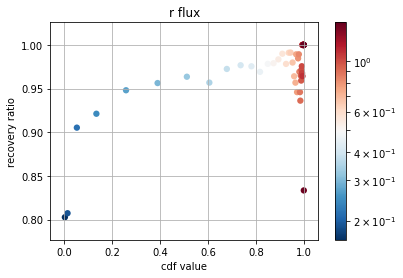

In [50]:


ngc,bins,_ = plt.hist(faint['sim_rflux'],cumulative=True,density=True,bins=50,alpha=0.5,label='flux r dist')

x = (bins[1:]+bins[:-1])/2.
sel1 = (detected['sim_rflux']>0)&(detected['sim_rflux']<4)
sel2 = (faint['sim_rflux']>0)&(faint['sim_rflux']<4)
nr,bins,_ = plt.hist(detected['sim_rflux'][sel1],bins=bins)
n2r,bins,_ = plt.hist(faint['sim_rflux'][sel2],bins=bins)
plt.clf()


plt.scatter(ngc,nr/n2r,edgecolors='none',s=40,c=x,cmap='RdBu_r',
                norm=matplotlib.colors.LogNorm())

plt.colorbar()
plt.grid()
plt.xlabel('cdf value')
plt.ylabel('recovery ratio')
plt.title('r flux')

In [40]:
x

array([1.61273674, 1.63672579, 1.66071484, 1.68470388, 1.70869293,
       1.73268198, 1.75667103, 1.78066007, 1.80464912, 1.82863817,
       1.85262721, 1.87661626, 1.90060531, 1.92459435, 1.9485834 ,
       1.97257245, 1.99656149, 2.02055054, 2.04453959, 2.06852863,
       2.09251768, 2.11650673, 2.14049577, 2.16448482, 2.18847387,
       2.21246291, 2.23645196, 2.26044101, 2.28443006, 2.3084191 ,
       2.33240815, 2.3563972 , 2.38038624, 2.40437529, 2.42836434,
       2.45235338, 2.47634243, 2.50033148, 2.52432052, 2.54830957,
       2.57229862, 2.59628766, 2.62027671, 2.64426576, 2.6682548 ,
       2.69224385, 2.7162329 , 2.74022194, 2.76421099, 2.78820004,
       2.81218908, 2.83617813, 2.86016718, 2.88415623, 2.90814527,
       2.93213432, 2.95612337, 2.98011241, 3.00410146, 3.02809051,
       3.05207955, 3.0760686 , 3.10005765, 3.12404669, 3.14803574,
       3.17202479, 3.19601383, 3.22000288, 3.24399193, 3.26798097,
       3.29197002, 3.31595907, 3.33994811, 3.36393716, 3.38792

/global/homes/h/huikong/.conda/envs/cfastpm/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5,1,'z flux')

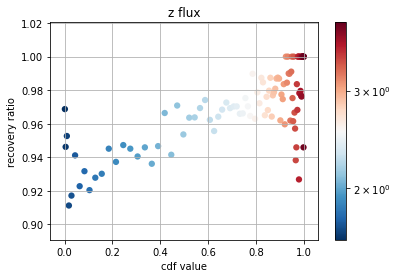

In [37]:
x = (bins[1:]+bins[:-1])/2.
plt.plot(x,ng/n2g,label='flux g')
plt.plot(x,nr/n2r,label='flux r')
plt.plot(x,nz/n2z,label='flux z')
plt.gca().set_xlim((0,2))

ngc,bins,_ = plt.hist(faint['sim_zflux'],cumulative=True,density=True,bins=bins,alpha=0.5,label='flux z dist')
plt.clf()

#plt.scatter(ngc,ng/n2g,norm=colors.LogNorm(vmin=x.min(), vmax=2),cmap='PuBu_r')

plt.scatter(ngc,nz/n2z,edgecolors='none',s=40,c=x,cmap='RdBu_r',
                norm=matplotlib.colors.LogNorm())

plt.colorbar()
plt.grid()
plt.xlabel('cdf value')
plt.ylabel('recovery ratio')
plt.title('z flux')

In [1]:
!pwd

/global/cscratch1/sd/huikong/wtheta_cal/mock_corr/nbody_kit/notebook


In [39]:
nr/n2r

array([0.7       , 0.81818182, 0.76923077, 0.82790698, 0.90044248,
       0.90832158, 0.92437811, 0.91893781, 0.94472084, 0.95129698,
       0.95631825, 0.95632754, 0.96198682, 0.96545563, 0.95881161,
       0.95464853, 0.97565217, 0.96896217, 0.97566372, 0.97794118,
       0.97131148, 0.98055105, 0.96282528, 0.97556391, 0.97575758,
       0.98105263, 0.9744898 , 0.9845679 , 0.98371336, 0.98322148,
       0.98828125, 0.99170124, 0.97244094, 0.98543689, 0.9895288 ,
       0.99310345, 1.        , 0.98181818, 0.99186992, 0.968     ,
       0.98130841, 0.94318182, 0.94680851, 0.97058824, 0.98      ,
       1.        , 0.96153846, 0.93220339, 0.98529412, 0.98387097,
       1.        , 0.97959184, 0.94117647, 1.        , 0.91891892,
       0.97297297, 0.86956522, 1.        , 0.96428571, 0.96551724,
       0.95454545, 0.96296296, 1.        , 0.95454545, 0.94117647,
       1.        , 0.9375    , 1.        , 1.        , 1.        ,
       0.9375    , 1.        , 1.        , 1.        , 1.     

In [51]:
!pwd

/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks
